In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data

data=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#Checking for null values

data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
#Checkibg for data types
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
# converting strings to datetime features
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

# Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [7]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848


In [8]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int32
trip_duration                  int64
dtype: object

In [9]:
#Feature engineering on datetime values

data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
#data['dropoff_dayofweek'] = data['dropoff_datetime'].dt.dayofweek


data['pickup_month'] = data['pickup_datetime'].dt.month
#data['dropoff_month'] = data['dropoff_datetime'].dt.month

data['pickup_week'] = data['pickup_datetime'].dt.week
#data['dropoff_week'] = data['dropoff_datetime'].dt.week

data['pickup_day'] = data['pickup_datetime'].dt.day
#data['dropoff_day'] = data['dropoff_datetime'].dt.day


data['pickup_hour'] = data['pickup_datetime'].dt.hour
#data['dropoff_hour'] = data['dropoff_datetime'].dt.hour




In [10]:
#Calculating trip distance from longitude and Latitude values

from math import sin, cos, sqrt, atan2, radians

def Distance(row):
    R = 6373.0  # approximate radius of earth in km
    x = radians(row['pickup_latitude'])
    y = radians(row['pickup_longitude'])
    x1 = radians(row['dropoff_latitude'])
    y1 = radians(row['dropoff_longitude'])
    
    d1 = y1 - y
    d2 = x1 - x
    
    x3 = sin(d2 / 2)**2 + cos(x) * cos(x1) * sin(d1 / 2)**2
    y3 = 2 * atan2(sqrt(x3), sqrt(1 - x3))
    result = R * y3
    
    return result

In [11]:
data['trip_distance'] = data.apply(lambda row: Distance(row), axis= 1)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofweek,pickup_month,pickup_week,pickup_day,pickup_hour,trip_distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,2,9,29,16,1.199449
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,3,10,11,23,4.130407
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,2,7,21,17,7.253029
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,1,5,9,2.361839
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,2,7,17,6,4.329893


In [12]:
#Checking for outliers
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [13]:
#removing outliers

Q1 = data['trip_duration'].quantile(0.25)
Q3 = data['trip_duration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['trip_duration'] >= Q1 - 1.5 * IQR) & (data['trip_duration'] <= Q3 + 1.5 *IQR)
data_cleaned= data.loc[filter] 

In [14]:
data_cleaned['trip_duration'].describe()/3600

count    192.321944
mean       0.203375
std        0.124510
min        0.000278
25%        0.106667
50%        0.175556
75%        0.275556
max        0.581111
Name: trip_duration, dtype: float64

In [15]:
#Truncating data due to hardware limitation in my personal pc
#This step is skipped otherwise

data_cleaned= data_cleaned.truncate(after=100)

In [16]:
data_benchmark = data_cleaned.drop(['id','dropoff_datetime','pickup_datetime','dropoff_longitude','pickup_longitude','dropoff_latitude','pickup_latitude'],axis=1)


In [17]:
data_benchmark

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_dayofweek,pickup_month,pickup_week,pickup_day,pickup_hour,trip_distance
0,2,1,0,400,0,2,9,29,16,1.199449
1,1,2,0,1100,4,3,10,11,23,4.130407
2,2,2,0,1635,6,2,7,21,17,7.253029
3,2,6,0,1141,1,1,1,5,9,2.361839
4,1,1,0,848,2,2,7,17,6,4.329893
...,...,...,...,...,...,...,...,...,...,...
96,1,2,0,181,6,3,9,6,10,0.419528
97,1,3,0,1507,5,6,22,4,3,5.111280
98,1,1,0,1178,1,6,25,21,19,4.097868
99,2,1,0,1439,0,2,9,29,18,6.174416


In [18]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data_benchmark = shuffle(data_benchmark, random_state = 42)

#creating 4 divisions
div = int(data_benchmark.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data_benchmark.loc[:3*div+1,:]
test = data_benchmark.loc[3*div+1:]

In [19]:
train.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_dayofweek,pickup_month,pickup_week,pickup_day,pickup_hour,trip_distance
43,2,5,0,346,2,4,16,20,14,0.701831
23,1,1,0,325,6,2,8,28,9,1.579791
59,1,1,0,1392,0,4,15,11,21,6.506580
77,2,2,0,533,3,6,24,16,18,0.991164
0,2,1,0,400,0,2,9,29,16,1.199449


In [20]:
test.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_dayofweek,pickup_month,pickup_week,pickup_day,pickup_hour,trip_distance
70,2,1,0,352,2,3,10,9,0,2.144388
73,2,2,0,711,0,5,19,9,16,2.000661
33,1,1,0,157,5,1,1,9,16,0.928554
83,2,1,0,1592,0,3,12,21,13,9.612816
9,1,1,0,1429,6,4,14,10,22,6.140237


In [21]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [22]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

484.1077943615257

Vendor_id Vs Trip_Duration

In [23]:
vendor = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vendor

,trip_duration
vendor_id,
1,1078.272727
2,796.500000


In [24]:
vendor_id= pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vendor_id

# initializing new column to zero
test['vendor_id_mean'] = 0

# For every unique entry in vendor_id
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendor_id_mean'][test['vendor_id'] == i] = train['trip_duration'][train['vendor_id'] == i].mean()

#calculating mean absolute error
vendor_id_error = MAE(test['trip_duration'] , test['vendor_id'] )
vendor_id_error


788.2089552238806

Passenger_count Vs Trip_duration

In [25]:
passenger = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger

,trip_duration
passenger_count,
1,853.095238
2,1011.666667
5,346.000000
6,1654.500000


In [26]:
# initializing new column to zero
test['passenger_mean'] = 0

# For every unique entry in passenger_count
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

#calculating mean absolute error
passenger_count_error = MAE(test['trip_duration'] , test['passenger_count'] )
passenger_count_error

788.0746268656717

Store_and_fwd_flag Vs Trip_duration

In [27]:
store_and_fwd_flag = pd.pivot_table(train, values='trip_duration', index = ['store_and_fwd_flag'], aggfunc=np.mean)
passenger

,trip_duration
passenger_count,
1,853.095238
2,1011.666667
5,346.000000
6,1654.500000


In [28]:

# initializing new column to zero
test['store_and_fwd_flag_mean'] = 0

# For every unique entry in store_and_fwd_flag
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd_flag_mean'][test['store_and_fwd_flag'] == i] = train['trip_duration'][train['store_and_fwd_flag'] == i].mean()

#calculating mean absolute error
store_and_fwd_flag_error = MAE(test['trip_duration'] , test['store_and_fwd_flag'] )
store_and_fwd_flag_error


789.7611940298508

Pickup_month Vs Trip_duration

In [29]:
pickup_month= pd.pivot_table(train, values='trip_duration', index = ['pickup_month'], aggfunc=np.mean)
pickup_month

,trip_duration
pickup_month,
1,1014.250000
2,549.600000
3,926.000000
4,902.142857
5,1503.500000
6,954.800000


In [30]:

# initializing new column to zero
test['pickup_month_mean'] = 0

# For every unique entry in pickup_month
for i in train['pickup_month'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_month_mean'][test['pickup_month'] == i] = train['trip_duration'][train['pickup_month'] == i].mean()

#calculating mean absolute error
pickup_month_error = MAE(test['trip_duration'] , test['pickup_month'] )
pickup_month_error

786.3283582089553

Pickup_dayofweek Vs Trip_duration

In [31]:
pickup_dayofweek= pd.pivot_table(train, values='trip_duration', index = ['pickup_dayofweek'], aggfunc=np.mean)
pickup_dayofweek

,trip_duration
pickup_dayofweek,
0,1015.000000
1,1418.600000
2,777.714286
3,837.000000
4,911.000000
6,412.666667


In [32]:

# initializing new column to zero
test['pickup_dayofweek_mean'] = 0

# For every unique entry in pickup_dayofweek
for i in train['pickup_dayofweek'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_dayofweek_mean'][test['pickup_dayofweek'] == i] = train['trip_duration'][train['pickup_dayofweek'] == i].mean()

#calculating mean absolute error
pickup_dayofweek_error = MAE(test['trip_duration'] , test['pickup_dayofweek'] )
pickup_dayofweek_error

786.7014925373135

Pickup_week Vs Trip_duration

In [33]:
pickup_week= pd.pivot_table(train, values='trip_duration', index = ['pickup_week'], aggfunc=np.mean)
pickup_week

,trip_duration
pickup_week,
2,419.000000
3,1609.500000
6,615.000000
7,848.000000
8,442.500000
9,400.000000
10,758.500000
13,1093.500000
14,700.000000


In [34]:
# initializing new column to zero
test['pickup_week_mean'] = 0

# For every unique entry in pickup_week
for i in train['pickup_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_week_mean'][test['pickup_week'] == i] = train['trip_duration'][train['pickup_week'] == i].mean()

#calculating mean absolute error
pickup_week_error = MAE(test['trip_duration'] , test['pickup_week'] )
pickup_week_error

776.955223880597

Pickup_day Vs Trip_duration

In [35]:
pickup_day= pd.pivot_table(train, values='trip_duration', index = ['pickup_day'], aggfunc=np.mean)
pickup_day

,trip_duration
pickup_day,
4,326.0
5,1461.0
7,1451.5
8,1006.5
9,352.0
11,1003.5
13,601.0
16,533.0
17,687.5


In [36]:
# initializing new column to zero
test['pickup_day_mean'] = 0

# For every unique entry in pickup_day
for i in train['pickup_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_day_mean'][test['pickup_day'] == i] = train['trip_duration'][train['pickup_day'] == i].mean()

#calculating mean absolute error
pickup_day_error = MAE(test['trip_duration'] , test['pickup_day'] )
pickup_day_error

773.776119402985

Pickup_hour Vs Trip_duration

In [37]:
pickup_hour= pd.pivot_table(train, values='trip_duration', index = ['pickup_hour'], aggfunc=np.mean)
pickup_hour

,trip_duration
pickup_hour,
0,352.000000
6,848.000000
8,1277.000000
9,1000.666667
12,1546.000000
13,339.000000
14,346.000000
15,817.000000
16,393.000000


In [38]:
# initializing new column to zero
test['pickup_hour_mean'] = 0

# For every unique entry in pickup_hour
for i in train['pickup_hour'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_hour_mean'][test['pickup_hour'] == i] = train['trip_duration'][train['pickup_hour'] == i].mean()

#calculating mean absolute error
pickup_hour_error = MAE(test['trip_duration'] , test['pickup_hour'] )
pickup_hour_error

775.2089552238806

Trip_distance Vs Trip_duration

In [39]:
trip_distance = pd.pivot_table(train, values='trip_duration', index = ['trip_distance'], aggfunc=np.mean)
trip_distance

,trip_duration
trip_distance,
0.406928,339
0.677139,311
0.701831,346
0.945542,560
0.991164,533
1.199449,400
1.373155,615
1.480537,326
1.579791,325


In [40]:
# initializing new column to zero
test['trip_distance_mean'] = 0

# For every unique entry in trip_distance
for i in train['trip_distance'].unique():
  # Assign the mean value corresponding to unique entry
  test['trip_distance_mean'][test['trip_distance'] == i] = train['trip_duration'][train['trip_distance'] == i].mean()

#calculating mean absolute error
trip_distance_error = MAE(test['trip_duration'] , test['trip_distance'] )
trip_distance_error

786.8163127140311

Two Features

In [41]:
two_features = pd.pivot_table(train, values = 'trip_duration', index = ['pickup_day','pickup_hour'], aggfunc = np.mean)
two_features

trip_duration
pickup_day pickup_hour               
4          20                     326
5          22                    1461
7          9                     1829
           15                    1074
8          9                      848
           22                    1165
9          0                      352
11         19                     615
           21                    1392
13         20                     311
           22                     891
16         18                     533
17         6                      848
           19                     527
18         22                    1942
19         21                    1375
20         14                     346
21         8                     1277
           19                    1178
22         23                     911
25         15                     560
26         16                     386
28         9                      325
29         16                     400
30         18                    1848
31         12                    1546
           13                     339

In [42]:
# Initiating new empty column
test['2features_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'pickup_day'
s1 = 'pickup_hour'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['2features_mean'][(test[s1] == i) & (test[s2]==j)] = train['trip_duration'][(train[s1] == i) & (train[s2]==j)].mean()

In [43]:
test_2_feature=test[test['2features_mean'].notnull()]

In [44]:
#calculating mean absolute error
two_features_error1 = MAE(test_2_feature['trip_duration'] , test_2_feature['2features_mean'] )
two_features_error1

700.5

Five Features

In [45]:
five_features=pd.pivot_table(train, values = 'trip_duration', index = ['pickup_day','pickup_week','pickup_hour','pickup_month','pickup_dayofweek'], aggfunc = np.mean)
print(five_features)

                                                                  trip_duration
pickup_day pickup_week pickup_hour pickup_month pickup_dayofweek               
4          14          20          4            0                           326
5          18          22          5            3                          1461
7          14          15          4            3                          1074
           23          9           6            1                          1829
8          10          22          3            1                          1165
           23          9           6            2                           848
9          10          0           3            2                           352
11         6           19          2            3                           615
           15          21          4            0                          1392
13         2           20          1            2                           311
           15          22          4    

In [46]:

# Initiating new empty column
test['5features_mean'] = 0

# Assigning variables to strings ( to shorten code length)

s5='pickup_dayofweek'
s4='pickup_month'
s3='pickup_hour'
s2 = 'pickup_week'
s1 = 'pickup_day'


# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2 and so on
  for j in test[s2].unique():
        for k in test[s3].unique():
              for l in test[s4].unique():
                      for m in test[s5].unique():
                            # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 and so on simultaneously
                            test['5features_mean'][(test[s1] == i) & (test[s2]==j) & (test[s3] == k) & (test[s4]==l) & (test[s5] == m) ] = train['trip_duration'][(train[s1] == i) & (train[s2]==j)  & (train[s3] == k) & (train[s4]==l) & (train[s5] == m)].mean()

In [47]:
test_5_feature=test[test['5features_mean'].notnull()]
five_features_error = MAE(test_5_feature['trip_duration'] , test_5_feature['5features_mean'] )
five_features_error

700.5

All Features

In [48]:
all_features=pd.pivot_table(train, values = 'trip_duration', index = ['pickup_day','pickup_week','pickup_hour','pickup_month','pickup_dayofweek','trip_distance','passenger_count','store_and_fwd_flag','vendor_id'], aggfunc = np.mean)
print(five_features)

                                                                  trip_duration
pickup_day pickup_week pickup_hour pickup_month pickup_dayofweek               
4          14          20          4            0                           326
5          18          22          5            3                          1461
7          14          15          4            3                          1074
           23          9           6            1                          1829
8          10          22          3            1                          1165
           23          9           6            2                           848
9          10          0           3            2                           352
11         6           19          2            3                           615
           15          21          4            0                          1392
13         2           20          1            2                           311
           15          22          4    

In [ ]:
#Due to limitations in pc this step takes too long to complete

# Initiating new empty column
test['all_features_mean'] = 0

# Assigning variables to strings ( to shorten code length)

s9='vendor_id'
s8='store_and_fwd_flag'
s7='passenger_count'
s6='trip_distance'
s5='pickup_dayofweek'
s4='pickup_month'
s3='pickup_hour'
s2 = 'pickup_week'
s1 = 'pickup_day'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2 and so on
  for j in test[s2].unique():
        for k in test[s3].unique():
              for l in test[s4].unique():
                      for m in test[s5].unique():
                              for n in test[s6].unique():
                                    for o in test[s7].unique():
                                          for p in test[s8].unique():
                                                  for q in test[s9].unique():
                                                        # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 and so on simultaneously
                                                            test['all_features_mean'][(test[s1] == i) & (test[s2]==j) & (test[s3] == k) & (test[s4]==l) & (test[s5] == m) & (test[s6]==n) & (test[s7] == o) & (test[s8]==p) & (test[s9] == q) ] = train['trip_duration'][(train[s1] == i) & (train[s2]==j)  & (train[s3] == k) & (train[s4]==l) & (train[s5] == m) & (train[s6]==n)  & (train[s7] == o) & (train[s8]==p) & (train[s9] == q)].mean()
                                                            
                        
test_all_features=test[test['all_features_mean'].notnull()]
all_features_error = MAE(test_all_features['trip_duration'] , test_all_features['all_features_mean'] )
all_features_error

In [54]:
names=['No feature','1 feature','2 features', '5 features']
values=[simple_mean_error,pickup_day_error,two_features_error1,five_features_error]
values=np.round(values,2)

Text(0.5, 1.0, 'Benchmark Scores')

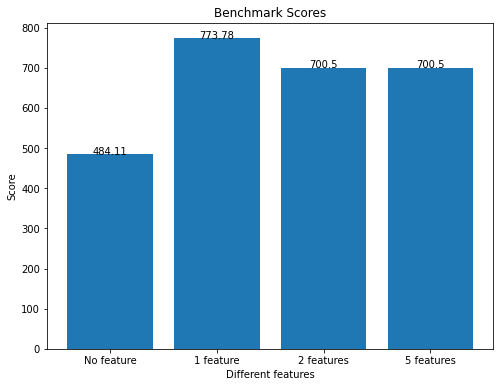

In [55]:
#Evaluation
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

plt.figure(figsize=(8, 6))
plt.bar( names,values )
addlabels(names,values)
plt.xlabel( "Different features")
plt.ylabel('Score')
plt.title('Benchmark Scores')